In [79]:
# we must know the experiment index, ideally also know the temperature
Temper_i = 273.15 + 25
index_exp = 2

In [80]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
import pybamm as pb;import pandas as pd   ;import numpy as np;
import os;
import matplotlib.pyplot as plt;import os;import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
import scipy.optimize
import timeit
import random;import time, signal
fs=17; # python -m ipykernel install --user --name=EnvPBGEM_Linux --display-name "Python_Linux"
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [82]:
# define global index and dict for all experiment data - prepare for read!
Exp_Path = [
    "Expt 1 - Si-based Degradation/",
    "Expt 2,2 - C-based Degradation 2/",
    "Expt 3 - Cathode Degradation and Li-Plating/",
    "Expt 4 - Drive Cycle Aging (Control)/",
    "Expt 5 - Standard Cycle Aging (Control)/",]
Exp_head = [
    "Expt 1",
    "Expt 2,2",
    "Expt 3",
    "Expt 4",
    "Expt 5",]
Exp_1_Cell = ["A","B","J","D","E","F","K","L","M"];
Exp_1_Temp = {
    "A":"10","B":"10","J":"10",
    "D":"25","E":"25","F":"25",
    "K":"40","L":"40","M":"40",}
Temp_Cell_Exp_1 = {
    "10":["A","B","J"],
    "25":["D","E","F"],
    "40":["K","L","M"],}
Exp_2_Cell = ["A","B","C","D","E","F"];
Exp_2_Temp = {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",}
Temp_Cell_Exp_2 = {
    "10":["A","B"],
    "25":["C","D"],
    "40":["E","F"],}
Exp_3_Cell = ["A","B","C","D","E","F","G","H","I"];
Exp_3_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25","F":"25",
    "G":"40","H":"40","I":"40"}
Temp_Cell_Exp_3 = {
    "10":["A","B","C"],
    "25":["D","E","F"],
    "40":["G","H","I"],}
Exp_4_Cell = ["A","B","C","D","E","F","G","H"];
Exp_4_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_4 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_5_Cell = ["A","B","C","D","E","F","G","H"];
Exp_5_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_5 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_All_Cell  = [Exp_1_Cell,Exp_2_Cell,Exp_3_Cell,Exp_4_Cell,Exp_5_Cell]
Exp_Temp_Cell = [Exp_1_Temp,Exp_2_Temp,Exp_3_Temp,Exp_4_Temp,Exp_5_Temp]
Temp_Cell_Exp_All = [Temp_Cell_Exp_1,Temp_Cell_Exp_2,Temp_Cell_Exp_3,Temp_Cell_Exp_4,Temp_Cell_Exp_5]
Mark_Cell_All = [
    {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",},
    {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">","F":"v",
    "G":"o","H":">","I":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",}]
Color_Cell_All = [
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"C":[0, 0, 0,0.7],
    "E":[1,0,0,0.4],"F":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "G":[1,0,0,0.4],"H":[1,0,0,0.4],"I":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],}]


In [83]:
# ready experiment data
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip/Rio_Code/Fun_P2"))
sys.path.append(str_path_1) 
from Fun_P2 import * # directly do this for HPC
# Load Niall's data
Path_NiallDMA = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/InputData/") 
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 
Exp_Any_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[index_exp-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[index_exp-1],
    index_exp-1)

Finish reading Experiment!


In [84]:
# Reload all 1000 scans  
BasicPath = os.path.expanduser(
    "~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/Exp2_SEI_Only/") # for Linux
Big_start = 1; Big_end = 200; case_no=10;
Scan_start_all = (
    np.arange(Big_start,Big_end+1,case_no)
    ).tolist()
Scan_end_all = (
    np.arange(Big_start+case_no-1,Big_end+case_no,case_no)
    ).tolist()
# create the empty notebook
workbook = openpyxl.Workbook() 
sheet = workbook.active  
excel_name = "Summary of 200 cases_3"
sheet_title = "Summary" 
sheet.title = sheet_title
workbook.save(BasicPath+f"{excel_name}.xlsx" )
print("Create the summary file for the 200 cases")

# check whether all cases succeed, if so, it should contains a png file start with 0_Scan
def Check_all_succeed(Scan_start,Scan_end,BasicPath):
    # List all files in the folder   
    target_folder = BasicPath + f"Exp2_Case_{Scan_start}_{Scan_end}" 
    #print(target_folder)
    files = os.listdir(target_folder)
    # Check if any file matches the criteria
    Flag_all_succeed = False
    for file_name in files:
        if file_name.endswith('.png') and '0_Scan' in file_name:
            Flag_all_succeed = True
            break
    if Flag_all_succeed:
        print(f"All cases succeed from {Scan_start} to {Scan_end}")
    else:
        print(f"Some cases failed from {Scan_start} to {Scan_end}")
    return Flag_all_succeed

def Plot_summary(Scan_start,Scan_end,Temper_i,Exp_Any_AllData,dpi):
    Indexs =np.arange(Scan_start-1,Scan_end)
    index_list = Indexs+1
    All_Scans = {}
    for scan in index_list:
        All_Scans[str(scan)]={}
        try:
            All_Scans[str(scan)] = loadmat( 
            BasicPath + f"Exp2_Case_{Scan_start}_{Scan_end}/" 
            +  "Mats/" + str(scan)+ "-Ageing_summary_only.mat")
        except:
            print(f"Nothing in Scan {scan}")
    # plot
    Num_subplot = 5;
    fig, axs = plt.subplots(Num_subplot,1, figsize=(6,13),tight_layout=True)
    cm = mpl.cm.get_cmap("cool", len(index_list))  
    for i,scan in enumerate(index_list):
        try:
            axs[0].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]['CDend SOH [%]'][0],     
                '-o',color=cm(i),  ) # label="Scan=" + str(scan)
            axs[1].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]["CDend LLI [%]"][0],'-o',color=cm(i), )
            axs[2].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_ne [%]"][0],'-o',   color=cm(i),   ) 
            axs[3].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_pe [%]"][0],    '-o', color=cm(i),  ) 
            axs[4].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"][0]),   '-o', color=cm(i), )
        except:
            pass
        else:
            pass 
    # Plot Charge Throughput (A.h) vs SOH
    color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
    color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";

    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temper_i- 273.15))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temper_i- 273.15))]
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[0].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}") 
        axs[1].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}")  
        axs[2].plot(
            chThr_temp,np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp, )
        axs[3].plot(
            chThr_temp,np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp,)
        # update 230312- plot resistance here
        df = Exp_Any_AllData[cell]["Extract Data"]
        # Exp_1_AllData["A"]["Extract Data"]["0.1s Resistance (Ohms)"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[4].plot(
            #df["Days of degradation"][index_Res],
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
    # Update 230518: Plot Experiment Average - at 1 expeirment and 1 temperature
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg]  = XY_pack
    axs[0].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    axs[1].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg")  
    axs[2].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg, )
    axs[3].plot(
        X_1_st,Y_4_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg,)
    axs[4].plot(
        X_5_st,Y_5_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg)
    axs[0].set_ylabel("SOH %")
    axs[1].set_ylabel("LLI %")
    axs[2].set_ylabel("LAM NE %")
    axs[3].set_ylabel("LAM PE %")
    axs[4].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[4].set_xlabel("Charge Throughput (kA.h)")
    for i in range(0,Num_subplot):
        labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
    axs[4].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    axs[1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    fig.suptitle(
        f"0_Scan {index_list[0]}-{index_list[-1]}-Exp-{index_exp}-{str(int(Temper_i- 273.15))}"
        +r"$^\circ$C - Summary", fontsize=fs+2)
    plt.savefig(
        BasicPath + f"Exp2_Case_{Scan_start}_{Scan_end}/" +  
        f"0_Scan {index_list[0]}-{index_list[-1]}-Exp-{index_exp}-{str(int(Temper_i- 273.15))}degC Summary.png", dpi=dpi)
    plt.close() 
    return

def Collect_1case_Excel(Scan_start,Scan_end):
    Indexs =np.arange(Scan_start-1,Scan_end)
    Index_List_succeed = Indexs+1
    Round_No = f"Case_{Scan_start}_{Scan_end}"  
    book_name_xlsx = f'Exp{index_exp}_{Round_No}.xlsx';
    sheet_name_xlsx = 'Results';
    for k,index_i in enumerate(Index_List_succeed):
        #print(index_i)
        try:
            old_book = str(index_i) + '_' + book_name_xlsx
            #print(old_book)
            #open excel:
            data_old = openpyxl.load_workbook(
                BasicPath + f"Exp2_Case_{Scan_start}_{Scan_end}/" +   "Excel/" + old_book)   
            data_tar = openpyxl.load_workbook(
                BasicPath + f"Exp2_Case_{Scan_start}_{Scan_end}/" +   book_name_xlsx) 

            table_old = data_old[str(index_i)]
            nrows_old = table_old.max_row  # 获得行数
            ncolumns_old = table_old.max_column  # 获得列数

            table_tar = data_tar[sheet_name_xlsx]
            nrows_tar = table_tar.max_row # ncolumns_old + k +1 # Mark!!! Most important changes!
            ncolumns_old = table_old.max_column  # 获得列数
            list_old = [];
            #print(nrows_old,nrows_tar)
            for i in range(1,nrows_old+1):
                for j in range(1,ncolumns_old+1):
                    list_old.append(table_old.cell(row=i,column=j).value)
            
            list_old = [list_old,]
            for i in range(1, len(list_old)+1):
                    for j in range(1, len(list_old[i-1])+1):
                        #print(i,j,list_old[i-1][j-1]    )
                        table_tar.cell(nrows_tar+i, j).value = list_old[i-1][j-1]     
            data_tar.save(
                BasicPath + f"Exp2_Case_{Scan_start}_{Scan_end}/" 
                + book_name_xlsx) 
            data_tar.close()
        except:
            print(f"Something goes wrong for Scan {index_i}!")
        else:
            print(f"Successfuly write results for Scan {index_i}!") 
    return

# save all results into the summary file
def Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title):
    # Open the source workbook
    Round_No = f"Case_{Scan_start}_{Scan_end}"  
    book_name_xlsx = f'Exp{index_exp}_{Round_No}.xlsx';
    source_workbook = openpyxl.load_workbook(
        filename=BasicPath + f"Exp2_Case_{Scan_start}_{Scan_end}/" 
        + book_name_xlsx)
    # Open the target workbook
    target_workbook = openpyxl.load_workbook(
        BasicPath+f"{excel_name}.xlsx" )
    # Get the active sheet of the source workbook
    source_sheet = source_workbook.active
    # Get the target sheet by name
    target_sheet = target_workbook[sheet_title]

    # Copy the values and formatting from the source sheet to the target sheet
    if Scan_start==1:
        for row in source_sheet.iter_rows(values_only=True):
            target_sheet.append(row)
    else:
        for row in source_sheet.iter_rows(values_only=True):
            if row != next(source_sheet.iter_rows(values_only=True)):
                target_sheet.append(row)

    # Save the changes to the target workbook
    target_workbook.save(BasicPath+f"{excel_name}.xlsx")
    print(f"Successfully collect Case_{Scan_start}_{Scan_end}")
    return 
# collect all results:
for Scan_start,Scan_end in zip(Scan_start_all,Scan_end_all):
    Flag_all_succeed = False # Check_all_succeed(Scan_start,Scan_end,BasicPath)
    if Flag_all_succeed:
        Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title)
    else:
        # first, plot summary
        Plot_summary(Scan_start,Scan_end,Temper_i,Exp_Any_AllData,dpi=100)
        # then collect single cases into a summary of the 10 cases
        Collect_1case_Excel(Scan_start,Scan_end)
        # finally, collect the 10 cases into a bigger file
        Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title)

Create the summary file for the 200 cases


/tmp/ipykernel_1442/768230541.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = mpl.cm.get_cmap("cool", len(index_list))


Successfuly write results for Scan 1!
Successfuly write results for Scan 2!
Successfuly write results for Scan 3!
Successfuly write results for Scan 4!
Successfuly write results for Scan 5!
Successfuly write results for Scan 6!
Successfuly write results for Scan 7!
Successfuly write results for Scan 8!
Successfuly write results for Scan 9!
Successfuly write results for Scan 10!
Successfully collect Case_1_10
Successfuly write results for Scan 11!
Successfuly write results for Scan 12!
Successfuly write results for Scan 13!
Successfuly write results for Scan 14!
Successfuly write results for Scan 15!
Successfuly write results for Scan 16!
Successfuly write results for Scan 17!
Successfuly write results for Scan 18!
Successfuly write results for Scan 19!
Successfuly write results for Scan 20!
Successfully collect Case_11_20
Successfuly write results for Scan 21!
Successfuly write results for Scan 22!
Successfuly write results for Scan 23!
Successfuly write results for Scan 24!
Successful

In [63]:
# tidy up the 1000 cases - delete the rows with "Unknown" - should upgrade in the future to keep 
from openpyxl import load_workbook
workbook = load_workbook(filename=BasicPath+f"{excel_name}.xlsx")
sheet = workbook.active
# Convert rows to a list and iterate over it in reverse order
rows = list(sheet.iter_rows(values_only=True))
for row in reversed(range(len(rows))):
    if "Unknown" in rows[row]:
        sheet.delete_rows(row + 1)  # Delete the row
workbook.save(filename=BasicPath+f"{excel_name}.xlsx")

In [ ]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2
import pybamm as pb;import pandas as pd;import numpy as np;
import os, json,openpyxl,traceback,multiprocessing,scipy.optimize
import matplotlib.pyplot as plt;
import imageio,timeit,random,time, signal
from scipy.io import savemat,loadmat;
from pybamm import constants,exp;import matplotlib as mpl; 
fs=17; 
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

/tmp/ipykernel_1442/2754290159.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = mpl.cm.get_cmap("cool", len(Selected))


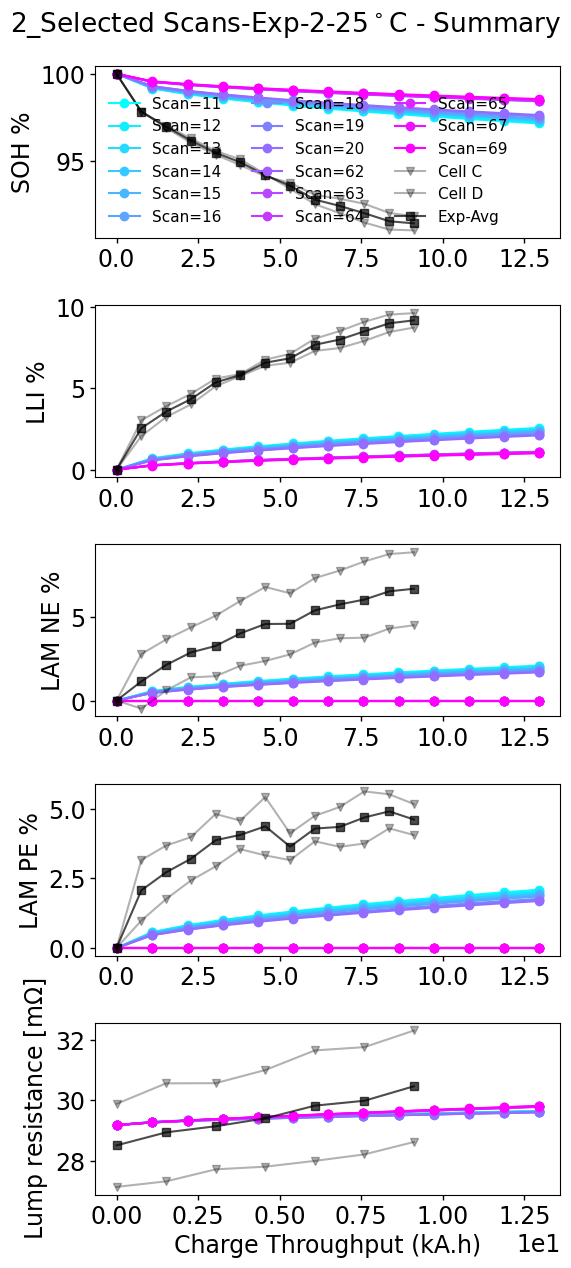

In [64]:
# finish now, should hand over to the next one
def Plot_Selected_scans(Selected,Temper_i,Exp_Any_AllData,dpi):
    # plot
    Num_subplot = 5;
    fig, axs = plt.subplots(Num_subplot,1, figsize=(6,13),tight_layout=True)
    cm = mpl.cm.get_cmap("cool", len(Selected)) 
    All_Scans = {}
    for i,scan in enumerate(Selected):
        Scan_start = ((scan - 1) // 10) * 10 + 1
        Scan_end = Scan_start + 9 
        All_Scans[str(scan)] = loadmat( 
            BasicPath + f"Exp2_Case_{Scan_start}_{Scan_end}/" 
            +  "Mats/" + str(scan)+ "-Ageing_summary_only.mat")
        try:
            axs[0].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]['CDend SOH [%]'][0],     
                '-o',color=cm(i), label="Scan=" + str(scan)) # 
            axs[1].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]["CDend LLI [%]"][0],'-o',color=cm(i), )
            axs[2].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_ne [%]"][0],'-o',   color=cm(i),   ) 
            axs[3].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_pe [%]"][0],    '-o', color=cm(i),  ) 
            axs[4].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"][0]),   '-o', color=cm(i), )
        except:
            pass
        else:
            pass 
    # Plot Charge Throughput (A.h) vs SOH
    color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
    color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";

    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temper_i- 273.15))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temper_i- 273.15))]
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[0].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}") 
        axs[1].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}")  
        axs[2].plot(
            chThr_temp,np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp, )
        axs[3].plot(
            chThr_temp,np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp,)
        # update 230312- plot resistance here
        df = Exp_Any_AllData[cell]["Extract Data"]
        # Exp_1_AllData["A"]["Extract Data"]["0.1s Resistance (Ohms)"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[4].plot(
            #df["Days of degradation"][index_Res],
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
    # Update 230518: Plot Experiment Average - at 1 expeirment and 1 temperature
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg]  = XY_pack
    axs[0].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    axs[1].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg")  
    axs[2].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg, )
    axs[3].plot(
        X_1_st,Y_4_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg,)
    axs[4].plot(
        X_5_st,Y_5_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg)
    axs[0].set_ylabel("SOH %")
    axs[1].set_ylabel("LLI %")
    axs[2].set_ylabel("LAM NE %")
    axs[3].set_ylabel("LAM PE %")
    axs[4].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[4].set_xlabel("Charge Throughput (kA.h)")
    for i in range(0,Num_subplot):
        labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
    axs[4].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0].legend(
        prop={'family':'DejaVu Sans','size':fs-6},
        loc='best',ncol=3,frameon=False)
    # axs[1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    fig.suptitle(
        f"2_Selected Scans-Exp-{index_exp}-{str(int(Temper_i- 273.15))}"
        +r"$^\circ$C - Summary", fontsize=fs+2)
    plt.savefig(
        BasicPath + f"Plots_collect/" +  
        f"2_Selected Scans-Exp-{index_exp}-{str(int(Temper_i- 273.15))}degC Summary.png", dpi=dpi)
    # plt.close() 
    return All_Scans
Selected=[11,12,13,14,15,16,18,19,20,62,63,64,65,67,69,]
All_Scans = Plot_Selected_scans(Selected,Temper_i,Exp_Any_AllData,dpi=400)

In [66]:
# replot everything:
BasicPath = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/Exp2_SEI_Only/") # for Linux
Big_start = 1; Big_end = 200; case_no=10;
Scan_start_all = (
    np.arange(Big_start,Big_end+1,case_no)
    ).tolist()
Scan_end_all = (
    np.arange(Big_start+case_no-1,Big_end+case_no,case_no)
    ).tolist()
# cre
def Plot_summary2(Scan_start,Scan_end,Temper_i,Exp_Any_AllData,dpi):
    Indexs =np.arange(Scan_start-1,Scan_end)
    index_list = Indexs+1
    All_Scans = {}
    for scan in index_list:
        All_Scans[str(scan)]={}
        try:
            All_Scans[str(scan)] = loadmat( 
            BasicPath + f"Exp2_Case_{Scan_start}_{Scan_end}/" 
            +  "Mats/" + str(scan)+ "-Ageing_summary_only.mat")
        except:
            print(f"Nothing in Scan {scan}")
    # plot
    Num_subplot = 5;
    fig, axs = plt.subplots(Num_subplot,1, figsize=(6,13),tight_layout=True)
    cm = mpl.cm.get_cmap("cool", len(index_list))  
    for i,scan in enumerate(index_list):
        try:
            axs[0].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]['CDend SOH [%]'][0],     
                '-o',color=cm(i),  ) # label="Scan=" + str(scan)
            axs[1].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]["CDend LLI [%]"][0],'-o',color=cm(i), )
            axs[2].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_ne [%]"][0],'-o',   color=cm(i),   ) 
            axs[3].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_pe [%]"][0],    '-o', color=cm(i),  ) 
            axs[4].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"][0]),   '-o', color=cm(i), )
        except:
            pass
        else:
            pass 
    # Plot Charge Throughput (A.h) vs SOH
    color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
    color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";

    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temper_i- 273.15))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temper_i- 273.15))]
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[0].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}") 
        axs[1].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}")  
        axs[2].plot(
            chThr_temp,np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp, )
        axs[3].plot(
            chThr_temp,np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp,)
        # update 230312- plot resistance here
        df = Exp_Any_AllData[cell]["Extract Data"]
        # Exp_1_AllData["A"]["Extract Data"]["0.1s Resistance (Ohms)"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[4].plot(
            #df["Days of degradation"][index_Res],
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
    # Update 230518: Plot Experiment Average - at 1 expeirment and 1 temperature
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg]  = XY_pack
    axs[0].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    axs[1].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg")  
    axs[2].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg, )
    axs[3].plot(
        X_1_st,Y_4_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg,)
    axs[4].plot(
        X_5_st,Y_5_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg)
    axs[0].set_ylabel("SOH %")
    axs[1].set_ylabel("LLI %")
    axs[2].set_ylabel("LAM NE %")
    axs[3].set_ylabel("LAM PE %")
    axs[4].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[4].set_xlabel("Charge Throughput (kA.h)")
    for i in range(0,Num_subplot):
        labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
    axs[4].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    axs[1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    fig.suptitle(
        f"1_Scan {index_list[0]}-{index_list[-1]}-Exp-{index_exp}-{str(int(Temper_i- 273.15))}"
        +r"$^\circ$C - Summary", fontsize=fs+2)
    plt.savefig(
        BasicPath + f"Plots_collect/Allscans/" +  
        f"0_Scan {index_list[0]}-{index_list[-1]}-Exp-{index_exp}-{str(int(Temper_i- 273.15))}degC Summary.png", dpi=dpi)
    plt.close() 
    return

for Scan_start,Scan_end in zip(Scan_start_all,Scan_end_all):
    Plot_summary2(Scan_start,Scan_end,Temper_i,Exp_Any_AllData,dpi=300)
    

/tmp/ipykernel_1442/1077047466.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = mpl.cm.get_cmap("cool", len(index_list))


Nothing in Scan 105
Nothing in Scan 109
Nothing in Scan 151
Nothing in Scan 152
Nothing in Scan 153
Nothing in Scan 154
Nothing in Scan 155
Nothing in Scan 156
Nothing in Scan 157
Nothing in Scan 158
Nothing in Scan 159
Nothing in Scan 160
Nothing in Scan 171
Nothing in Scan 172
Nothing in Scan 173
Nothing in Scan 174
Nothing in Scan 175
Nothing in Scan 176
Nothing in Scan 177
Nothing in Scan 178
Nothing in Scan 179
Nothing in Scan 180
Nothing in Scan 181
Nothing in Scan 183
Nothing in Scan 184
Nothing in Scan 185
Nothing in Scan 187
Nothing in Scan 191
Nothing in Scan 192
Nothing in Scan 193
Nothing in Scan 194
Nothing in Scan 195
Nothing in Scan 197
